In [1]:
import torch
import torchaudio
import librosa
import matplotlib.pyplot as plt
import numpy as np
import Utilities
import os

In [2]:
git_root_path = Utilities.get_git_root()
signal_spec = torch.load(os.path.join(git_root_path, 'rir_dataset_generator','dev_data','1.pt'))
theta_array = np.load(os.path.join(git_root_path, 'rir_dataset_generator','dev_data','theta.npy'))
dataset_config = np.load(os.path.join(git_root_path, 'rir_dataset_generator','dev_data','dataset_config.npy'),allow_pickle=True).item()

print(signal_spec.shape)
print(len(theta_array))
print(dataset_config)

(1, 201, 1278)
10
{'fs': 16000, 'receiver_position': [2, 1.5, 1.5], 'room_dimensions': [4, 5, 3], 'reverberation_time': 0.4, 'n_sample': 6400, 'R': 1, 'NFFT': 400, 'HOP_LENGTH': 160, 'Z_LOC_SOURCE': 1}


In [3]:
C = 340

fs = dataset_config['fs']
receiver_position = dataset_config['receiver_position']
room_dimensions = dataset_config['room_dimensions']
reverberation_time = dataset_config['reverberation_time']
n_sample = dataset_config['n_sample']
R = dataset_config['R']
NFFT = dataset_config['NFFT']
HOP_LENGTH = dataset_config['HOP_LENGTH']
Z_LOC_SOURCE = dataset_config['Z_LOC_SOURCE']


audio_transformer = torchaudio.transforms.InverseSpectrogram(n_fft=NFFT, hop_length=HOP_LENGTH,
                                                      center=True, pad=0, normalized=True)

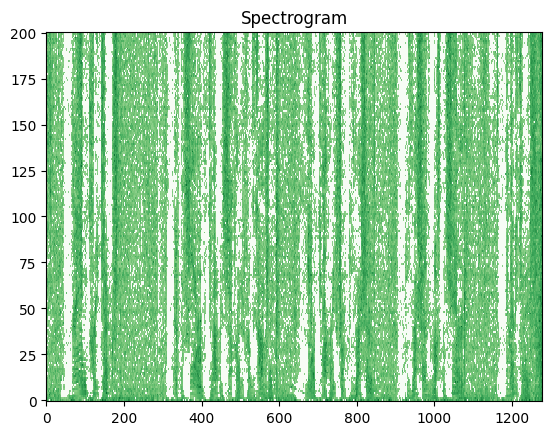

In [4]:
_, ax = plt.subplots(1, 1)
ax.imshow(librosa.power_to_db(signal_spec.squeeze()), origin="lower", aspect="auto", interpolation="nearest", cmap='Greens')
ax.set_title("Spectrogram")
plt.show()

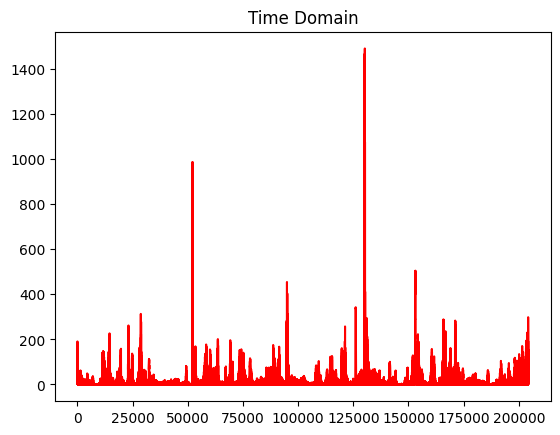

In [5]:
signal_td = audio_transformer(torch.from_numpy(signal_spec.astype(complex)))
plt.plot(range(signal_td.shape[1]),np.abs(signal_td).T, color="red")
plt.title("Time Domain")
plt.show()

In [6]:
import scipy.io.wavfile as wav_f

rate = fs
data = signal_td
scaled = np.float64(data / np.max(np.abs(data.numpy())) * 32767)
wav_f.write('test.wav', int(rate), scaled.astype(np.int16).squeeze())